In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import cv2

In [45]:
# loading the data file
data=pd.read_csv('./test.txt', header=None)

In [46]:
# (no_of_images,(28*28)pixels)
data.shape

(10740, 784)

In [47]:
# Normalize each pixel value from range[0,255] to range[0,1]
norm_data =data/255.0

In [48]:
# flattening the pixels into a 1D vector
flat_data = norm_data.values.reshape(norm_data.shape[0],-1)

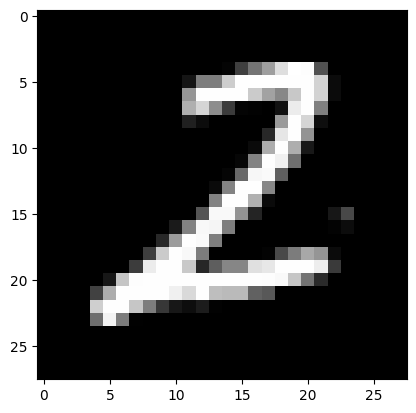

In [49]:
plt.imshow(flat_data[90].reshape(28, 28), cmap='gray');
plt.show()


In [50]:
def apply_blur(image, kernal_size=(3,3)):
  blurred_img = cv2.GaussianBlur(image,kernal_size,0)
  blurred_img = cv2.blur(blurred_img,kernal_size)
  return blurred_img

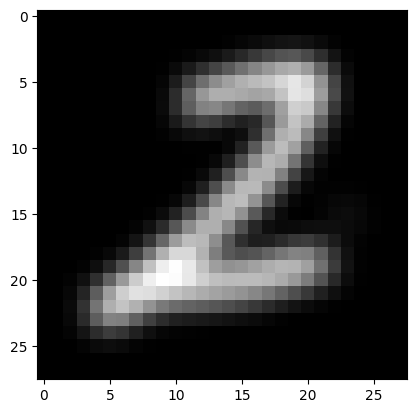

In [51]:
plt.imshow(apply_blur(flat_data[90].reshape(28, 28)), cmap='gray')

In [52]:
transformed_imgs = []

for image in range(flat_data.shape[0]):
  blurred_image = apply_blur(flat_data[image].reshape(28, 28))
  transformed_imgs.append(blurred_image.reshape(-1))

transformed_imgs = np.array(transformed_imgs)

In [53]:
transformed_imgs.shape

(10740, 784)

In [54]:
# dimensionality reduction where 90% data is retained
pca = PCA(n_components=0.90)
reduced_data = pca.fit_transform(transformed_imgs)

In [55]:
reduced_data.shape

(10740, 24)

In [56]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reduced_data)

In [31]:
# ms = MinMaxScaler(feature_range=(1,1000))
# scaled_data = ms.fit_transform(reduced_data)

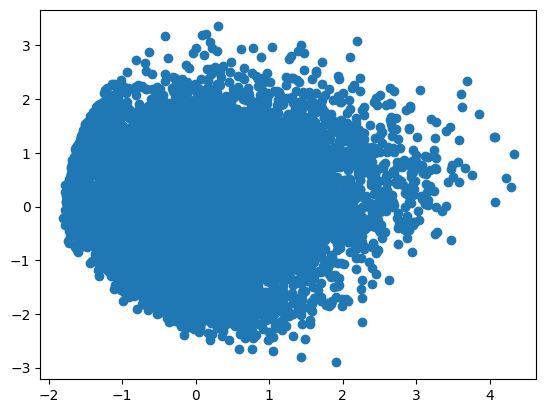

In [57]:
plt.scatter(scaled_data[:,0], scaled_data[:,1])

In [58]:
#Visualising high-dimensional data into lower dimensional (2D)
tsne = TSNE(n_components=2, random_state=42)
lower_dimension_data = tsne.fit_transform(scaled_data)

In [60]:
lower_dimension_data.shape

(10740, 2)

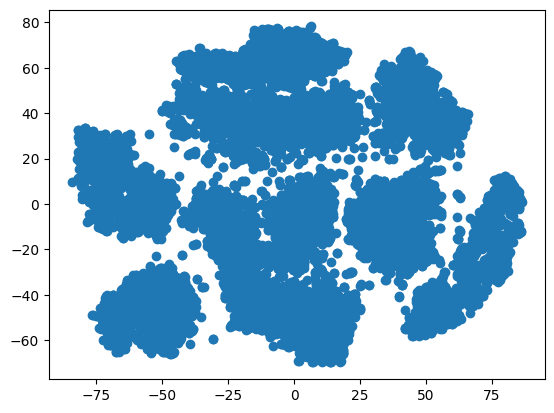

In [59]:
plt.scatter(lower_dimension_data[:,0], lower_dimension_data[:,1])

In [86]:
def generateRandomKCentroids(data,k):
  random_indices = np.random.randint(0,data.shape[0], size=(k,))
  centroids = data[random_indices, :]
  return centroids

In [87]:
def assignClusters(data, centroids):
  distances = np.linalg.norm(data[:,np.newaxis,:] - centroids, axis=2)
  clusters = np.argmin(distances, axis=1)
  return clusters

In [103]:
generateRandomKCentroids(lower_dimension_data,10)

array([[-51.943684  , -44.686066  ],
       [ 56.332966  , -51.293873  ],
       [-28.50019   ,  45.165237  ],
       [  1.9949006 , -15.422417  ],
       [-22.435886  , -33.824043  ],
       [-19.870653  , -11.613798  ],
       [-25.706007  ,  60.51675   ],
       [  3.7249413 , -25.612497  ],
       [-62.91601   ,  -6.83366   ],
       [ -0.61971843, -21.801748  ]], dtype=float32)

In [104]:
data = lower_dimension_data

In [105]:
centroids = generateRandomKCentroids(data, 10)
clusters = assignClusters(data, centroids)

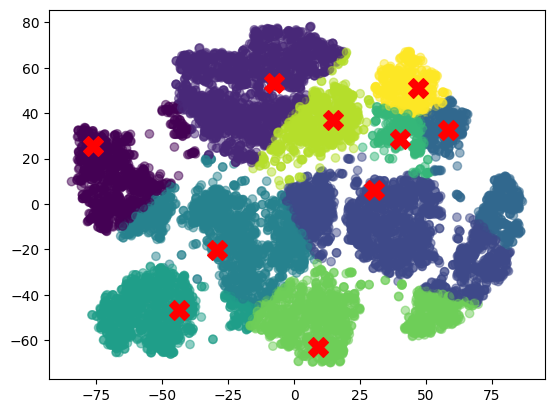

In [106]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

In [35]:
 def kmeansCluster(train_data, centroids, max_iterations=100):
  cluster_assigned = np.zeros(train_data.shape[0], dtype=int)

  for iteration in range(max_iterations):

    for i in range(train_data.shape[0]):
      distances = np.linalg.norm(train_data[i] - centroids, axis=1)
      nearest_k = np.argmin(distances)
      cluster_assigned[i] = nearest_k

    for cluster in range(centroids.shape[0]):
      cluster_points = train_data[cluster_assigned == cluster]
      if len(cluster_points) > 0:
          centroids[cluster] = np.mean(cluster_points, axis=0)
      else:
        random_indices = np.random.choice(train_data.shape[0], 1)
        centroids[cluster] = train_data[random_indices][0]
  return cluster_assigned, centroids

In [36]:
def evaluate_k_means(train_data, K_range):
  silhouette_scores = []

  for K in K_range:
    centroids = generateRandomKCentroids(train_data,K)
    cluster_assigned, final_centroids = kmeansCluster(train_data,centroids)
    silhouette_avg = silhouette_score(train_data, cluster_assigned)
    silhouette_scores.append(silhouette_avg)

  return silhouette_scores

Best K value: 2


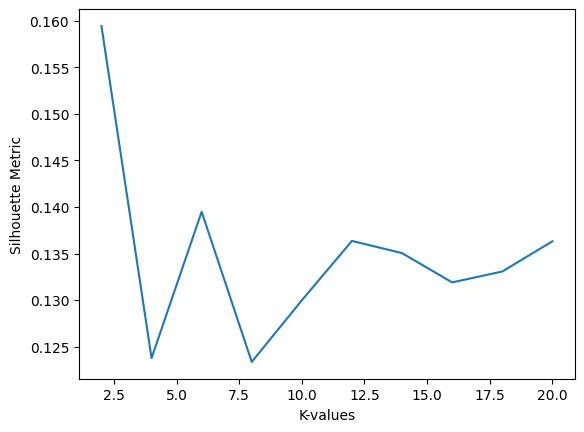

In [37]:
K_range = range(2, 21,2)
best_K = 0
best_cluster_assignments = []
# Evaluate clustering for different K values
silhouette_scores = evaluate_k_means(train_data, K_range)

best_K = K_range[np.argmax(silhouette_scores)]
print(f"Best K value: {best_K}")

# Plot the Silhouette Score for different K values
plt.xlabel("K-values")
plt.ylabel("Silhouette Metric")
plt.plot([i for i in K_range], silhouette_scores)
plt.show()

In [39]:
best_centroids = generateRandomKCentroids(train_data, 10)
best_cluster_assignments, _ = kmeansCluster(train_data, best_centroids)

# Print the best K value and its cluster assignments
print(f"Best K value: {best_K}")
print("Best cluster assignments:")
print(best_cluster_assignments)

# Save the best cluster assignments to a file
with open('best_cluster_assignments.txt', 'w') as file:
    for assignment in best_cluster_assignments:
        file.write(f"{assignment}\n")

Best K value: 2
Best cluster assignments:
[9 0 0 ... 5 5 5]
